# MECH 309: Assignment 1

_Cagri Arslan_

January 7, 2025

In [1]:
# Imports
import numpy as np 
import scipy.integrate
from matplotlib import pyplot as plt

plt.style.use("bmh") # plotting style

## Question 1

### a)

We are given the force distribution $f(x)$ from $x=0$ to $x=\ell=25\, \mathrm{m}$ as:

\begin{equation}
f(x) = 205\left(\frac{x}{x+7}\right)\exp\!\left(-\frac{2x}{\ell}\right)\quad\mathrm{[N/m]}
\tag{1}
\end{equation}

We plot $f(x)$ with $\Delta x = 1\, \mathrm{m}$ 

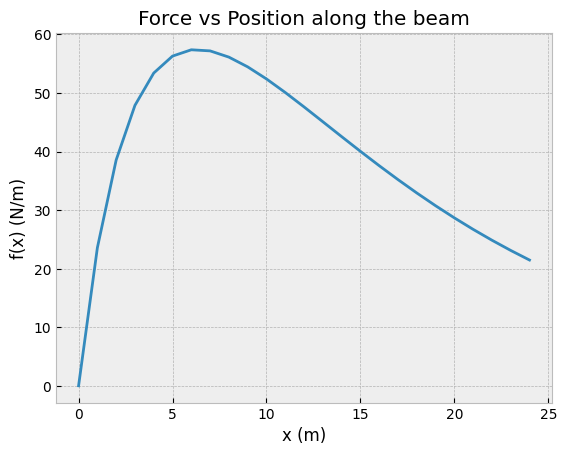

In [ ]:
# Set variables
a = 0.0 # Lower bound
l = 24.0 # Length of mast
dx = 1.0 # Step size
x = np.arange(a, l+dx, dx) # x values from a to l with step size dx

f = 205*(x/(x+7))*np.exp(-2*x/l)

# Plotting
plt.plot(x, f)

plt.xlabel("x (m)")
plt.ylabel("f(x) (N/m)")
plt.title("Force vs Position along the beam") 
plt.show()  

### b)

As $f(x)$ defines the force distribution, we must integrate it over the length of the member to compute the total force $F(x)$. 

\begin{equation}
F = \int_{0}^{\ell} f(x) \,dx \quad\mathrm{[N]}
\tag{2}
\end{equation}

Likewise, as $M = xF$ pointwise:

\begin{equation}
M = \int_{0}^{\ell} xf(x) \,dx \quad\mathrm{[Nm]}
\tag{3}
\end{equation}

We discretize and evaluate these integrals via the trapezoidal rule with $\Delta x = 1\mathrm{m}$ and $l = 24\mathrm{m}$. The trapezoidal rule is:
\begin{equation}
\int_{a}^{b} f(x) \approx \sum_{i=0}^{n-1} \frac{y_i+y_{i+1}}{2}\Delta x 
\tag{4}
\end{equation}

The function definitions for the force and moment distributions, and the script to approximate an integral through the trapezpodal rule are below:

In [ ]:
# Function definitions for plots

def force_dist(x):
    """
    force distribution function f(x)
    """
    return 205*(x/(x+7))*np.exp(-2*x/l)

def moment_dist(x):
    """
    moment distribution function M(x) = x * f(x)
    """
    return x * force_dist(x)
    
def trapezoidal_integral(f, a, b, dx):
    """
    Numerically approximate the definite integral of f from a to b using the
    trapezoidal rule with subintervals of length l. 

    Inputs:
        f (function): The function to integrate
        a (float): Lower bound of integration
        b (float): Upper bound of integration
        dx (float): Length of each subinterval

    Returns:
        I (float): The approximate value of the definite integral
    """
    # x-values for sample points
    x = np.arange(a, b + dx, dx)
   
    # Evaluate the function at all sample points
    y = f(x)

    # Calculate the integral using the trapezoidal rule
    I = 0.0 # Initialize 
    for i in range(len(x) - 1): # for
        I += 0.5 * dx * (y[i] + y[i+1])
    return I


We can now evaluate the total force $F$ and total moment $M$. The code to compute this is shown below. Their outputs are as follows:  
$ F \approx 973.40\: \mathrm{N} $  
$ M \approx 10701.52\: \mathrm{Nm\: (clockwise)} $

In [ ]:
# Define parameters
F = trapezoidal_integral(force_dist, a, l, dx)
M = trapezoidal_integral(moment_dist, a, l, dx)
print(f"Total Force F ={F: .2f} N")
print(f"Total Moment M ={M: .2f} Nm")


Total Force F = 973.40 N
Total Moment M = 10701.52 Nm


### c)

In $\mathbb{R}^2$, we can solve for up to three independent unknowns $(H, V, T)$ by simultaneously solving the force- and moment balance system:

\begin{align}
\sum F_x = 0 \tag{5}\\
\sum F_y = 0 \tag{6}\\
\sum M_H = 0 \tag{7}
\end{align}

Equations (5) and (7) are completed in the problem statement. We derive equation (6) through simple observation: $V - T\cos\alpha = 0$, where positive is "down to up", and $\alpha$ is the angle between the shroud and mast. The complete system of equations is:

\begin{align}
F - H - T\sin\alpha &= 0 \tag{8}\\
V - T \cos\alpha &= 0 \tag{9}\\
T\ell\sin\alpha - M &= 0 \tag{10}
\end{align}

Rearraning:
\begin{align}
H + T\sin\alpha &= F \tag{11}\\
V - T \cos\alpha &= 0 \tag{12}\\
T\ell\sin\alpha &= M \tag{13}
\end{align}

We can form an equation of the form $\mathbf{A}\mathbf{x} = \mathbf{b}$ as such:
\begin{equation}
\begin{bmatrix}
1 & 0 & \sin\alpha\\
0 & 1 & -\cos\alpha\\
0 & 0 & \ell\sin\alpha
\end{bmatrix}
\begin{bmatrix}
H\\
V\\
T
\end{bmatrix}
\end{equation}


In [ ]:
# Evaluate ``f(x)`` using ``x`` defined above.
f_x = f(x)

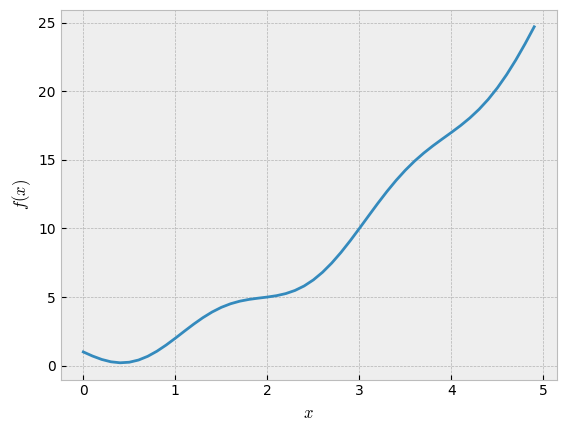

In [ ]:
# Plot function for 1c)
fig, ax = plt.subplots()
ax.plot(x, f_x)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.grid(linestyle='--')

The figure above shows that $\Delta x = 1$ is not an
appropriate step size for $f(x)$, as it is too large. The
derivative near zero should be negative, but since the step
size is too large, it is incorrectly approximated as positive.
In this case, a good rule of thumb would be to pick $\Delta x$
to be significantly smaller than the period of $\sin(\pi x)$.


## Question 2

### a)

The eigenvalues of $\mathbf{A}$ are
\begin{align}
    \lambda_0
    &=
    -0.25 +j 0.19364917,
    \\
    \lambda_1
    &=
    -0.25 -j 0.19364917,
\end{align}
as computed with `scipy.linalg.eigvals()`. They are plotted below.


In [ ]:
# Compute eigenvalues
A = np.array([
    [0, 1],
    [-0.1, -0.5],
])
eigv = scipy.linalg.eigvals(A)
print(eigv)

[-0.25+0.19364917j -0.25-0.19364917j]


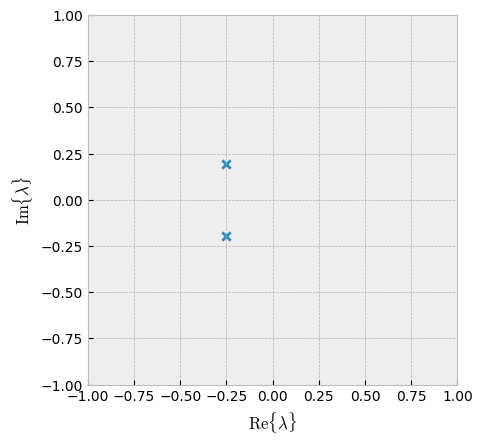

In [ ]:
# Plot eigenvalues
fig, ax = plt.subplots()
ax.scatter(np.real(eigv), np.imag(eigv), marker='x')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal')  # Force axis aspect ratio to be equal
ax.set_xlabel(r'$\mathrm{Re}\{\lambda\}$')
ax.set_ylabel(r'$\mathrm{Im}\{\lambda\}$')
ax.grid(linestyle='--')

### b)

The ODE is asymptotically stable because its eigenvalues are in the open left half-plane. In other words, their real parts are strictly negative.

### c)

The numerically integrated trajectory for $\mathbf{x}_0 = \begin{bmatrix}1 & 1 \end{bmatrix}^\mathsf{T}$ 

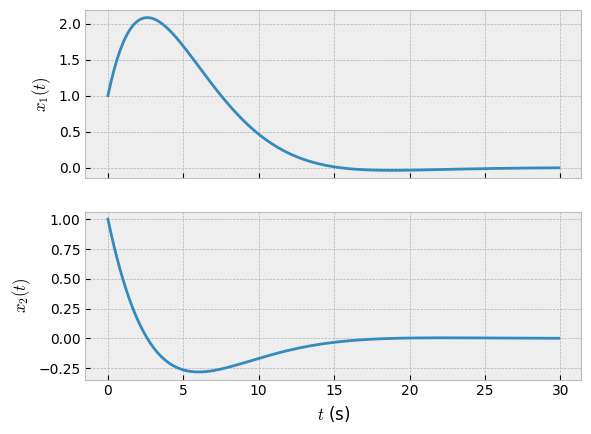

In [ ]:
def ivp(t, x):
    """Evaluate ``x_dot`` in (2)."""
    x_dot = A @ x.reshape((-1, 1))
    return x_dot.ravel()

# Solve initial value problem defined in ``ivp``
t_span = (0, 30)
t_step = 1e-1
t = np.arange(*t_span, t_step)
x0 = np.array([1, 1])
sol = scipy.integrate.solve_ivp(
    ivp,
    t_span=t_span,
    y0=x0,
    method='RK45',
    t_eval=t,
)

# Plot trajectory
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(t, sol.y[0, :])
ax[1].plot(t, sol.y[1, :])
ax[1].set_xlabel(r'$t$ (s)')
ax[0].set_ylabel(r'$x_1(t)$')
ax[1].set_ylabel(r'$x_2(t)$')
ax[0].grid(linestyle='--')
ax[1].grid(linestyle='--')